# Import Data and Library

Imporing the important libraries

In [1]:
pip install pdf2image

In [2]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=04a34478ae7169ab4d3356ab9c5ac6107b2cca109e9d33fa6b843de935d87107
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,376 kB/s)
debconf: unable to initi

In [4]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (300 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160753 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [5]:
import cv2
import os
import csv
import glob
from google.colab import files
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array,load_img
import re
import pdf2image
from PIL import Image
from matplotlib import pyplot
from pytesseract import image_to_string
from keras.preprocessing.image import load_img
from torchvision import transforms
from torchvision.transforms import InterpolationMode
from skimage.io import imread
from pytesseract import image_to_string,image_to_data
import pandas as pd
from pdf2image import convert_from_path
from PIL import Image
from pytesseract import Output
from matplotlib.patches import Rectangle
import numpy as np
import matplotlib.pyplot as plt

Importing test data and convereting pdf file to jpeg image

In [6]:
test = files.upload() #upload Test.csv

Saving Test.csv to Test.csv


In [7]:
if not os.path.exists('TestPDF'):
  os.makedirs('TestPDF')

In [8]:
if not os.path.exists('TestImages'):
  os.makedirs('TestImages')

In [ ]:
#Upload all the pdfs to TestPDF

In [9]:
count =0
for im in glob.glob('/content/TestPDF/*'):
  count = count+1
if(count==70):
  print('All PDF',count,'Uploaded')
else:
  print('Re upload all PDFs')

All PDF 70 Uploaded


In [10]:
df=pd.read_csv('Test.csv')
df.head()

,FileName,Total Amount
0,TE_131,NaN
1,TE_132,NaN
2,TE_133,NaN
3,TE_134,NaN
4,TE_135,NaN


# PDF to Image

In [11]:
for i in range(131,201):
  pages = convert_from_path('/content/TestPDF/TE_'+str(i)+'.pdf')
  for page in pages:
    page.save('/content/TestImages/TE_'+str(i)+'jpg', 'JPEG')

In [12]:
count =0
for im in glob.glob('/content/TestImages/*'):
  count = count+1
if(count==70):
  print('All PDF',count,'Converted')
else:
  print('Redo the PDF conversion')

All PDF 70 Converted


# Image Processing

Image preprocessing for better pytesseract accuracy

In [42]:
def image_preprocessing(path):
  #im=Image.open(path)
  #img=im.crop((200,800,1300,1700))
  img = cv2.imread(path,0)
  #roi = img[800:1700, 200:1300]
  img = cv2.medianBlur(img,5)

  ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
  th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

  titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
  images = [img, th1, th2, th3]

  for i in range(4):
    plt.plot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.show()
  new_image=images[3]
  return new_image

In [14]:
new_image=image_preprocessing('/content/TestImages/TE_152jpg')   #Example for showing how the image is being transfrormed for better results 
image_to_string(new_image)

'  \n \n\n \n\n1 Twisted Rueben\n\nSubtotal\n\n   \n \n\n1 Service Fee (6%)\nSales Tax (9.2%)\n\nTotal\nfe\nTip Helper\n.15%=2. 03 Tica 4 20%=2. n\n\nStart ing “January ‘6th, 2019\n\nCCR includes a 6% ‘service charge on each\né F! guest - “check. ‘ .\n\nThis service charge 1s- fully retained by\n\nthe company, not the setverss1t. wild be\nee pew ct de La fie ame ofa Gur\n\x0c'

Setting 400 dpi

In [15]:
for i in range(131,201):
  im = Image.open('/content/TestImages/TE_'+str(i)+'jpg')
  im.save('/content/TestImages/TE_'+str(i)+'jpg.jpeg',dpi=(400,400))
print('Done!')

Done!


'OI ge ate\npany, not the serverss,Tt will be\nNo) bem emt da: fair wades for. our\n\n \n\x0c'

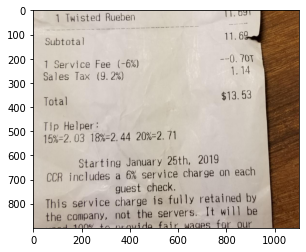

In [16]:
im=Image.open('/content/TestImages/TE_152jpg.jpeg')
im=im.crop((200,800,1300,1700))
plt.imshow(im)
im.save('new.jpeg')
im=image_preprocessing('new.jpeg')
image_to_string(im)

# Text Extraction

Extracting text from data

In [81]:
l_test=[]
for i in range(131,201):
  custom_config = r'-c tessedit_char_whitelist=TotalTOTALAmountCashTLDue$0123456789.: --psm 6'
  #im=Image.open('/content/TestImages/TE_'+str(i)+'jpg.jpeg')
  #im=im.crop((200,800,1300,1700)).copy()
  image=load_img('/content/TestImages/TE_'+str(i)+'jpg.jpeg')
  text=image_to_string(image,config=custom_config)
  l_test.append(text)
l_test

['BOA\n(310) 278-205!\nO051a TABLE 308 #Party ae\nBAR L SyrCk: 13 13:22 12/20/17\nSeparate checks: 1-of-3\n1 CRAB CAKE 15.00\n1 SKIRT STK LUNCH 28 .00\nSub Total: 43 .00\nTax: 4.09\nSub Total: 47.09\n12/20 14:29 TOTAL: =a. 9\nSUGGESTED GRATUITY\n18% 8.48\n20h 9,42\n\x0c',
 '1AMBI if >I RS\n3950 SLAUSON MAYWOOD, ¢ A 902770\nPHONE 323-588-1607\nMC #01\nREG CASHIER 11-24-2017 12:13 PM 000072\nMJ SC $0.01\n8B CHZ B SPC $8.80\nno pickles\nF FRIES - LRG $3.66\nCRISPY\nLRISPY\nF° FRIES - LRG $3. Bf\nCRISPY\nPI i MED DRINb $2.15\nnorchata\nHZ BURGER SPEC $7.57\nno onions\nEAT—IN\nTAXABLE SALES $25.85\nTAK $2.46\nII S285\nCASH $40.00\nCG $11.69\nORDER #t OQO0000005S2\nPLEASE HELP US SERVE YOU BETTER\nSERVICE WAS VERY GOOD mi\nGOOD A\nPOOR ‘al\n\x0c',
 '’ VIA EMILIA 9\n: 1120 15TH ST\nMIAMI BEACH, FL 33139\n7862167150\nORDER: Table 11\nCashier: V. ‘ 7 Key\n27-Apr-2017 6:21:59P\n1 Tagliatella al Ragu’ $14.90\n1 Cappellacci Di Zucca $18.90\n. Ss nate on Le tte | Di Ra p ne oe $22.90\n| ; a | $56.7

In [82]:
len(l_test)

70

# Extracting Bil Amount

Searching terms like total,cash and amount that may contain the total amount

In [83]:
ka=[]
for i in l_test:
  ka.append(i.split('\n'))
ka
for i in ka:
  j=0
  while j<len(i):
      #result1=re.search(r"subtotal", i[j].lower())
      result2=re.search(r"total", i[j].lower())
      result3=re.search(r"amount", i[j].lower())
      result4=re.search(r"cash", i[j].lower())
      result5=re.search(r"tl", i[j].lower())
      result6=re.search(r"total due", i[j].lower())
      if result2==None and result3==None and result4==None and result5==None and result6==None:
        i.pop(j)
      else:
        j=j+1
ka
final=[]
for i in range(len(ka)):
  for_this=[]
  for j in range(len(ka[i])):
    result=re.findall("\d+\.\d+",ka[i][j])     #This searches all the floating values in the string containg total,subtotal and amount 
    if len(result)>0:
      for_this.append(float(result[0]))
  if len(for_this)==0:
    final.append(0)
  else:
    final.append(max(for_this))               #Appending the maximum float value present for each image since total amount is the sum of prices of all the items
final

[47.09,
 40.0,
 0,
 12.11,
 0,
 0,
 13.13,
 0,
 25.94,
 0,
 25.47,
 84.8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 74.49,
 13.53,
 7.0,
 0,
 66.89,
 0,
 0,
 0,
 780.45,
 6.59,
 31.45,
 0,
 0,
 0,
 22.4,
 117.0,
 42.16,
 0,
 8.0,
 0,
 100.26,
 523.0,
 11.15,
 16.55,
 55.38,
 10.0,
 0,
 0,
 0,
 49.5,
 0,
 0,
 0,
 0,
 193.35,
 0,
 49.5,
 50.38,
 0,
 0,
 118.46,
 0,
 37.29,
 0,
 0,
 31.54,
 0,
 0,
 0,
 0]

In [21]:
def Trim(s):
  new_s=''
  for i in range(len(s)):
    if s[i] in '1234567890.':
      new_s=new_s+s[i]
  return new_s
Trim('154.  7868')

'154.7868'

In [84]:
for i in range(len(final)):
  if final[i]==0:
    s=l_test[i]
    for j in range(len(s)):
      result=re.findall('\d+\. +\d+',s[j])
      result2=re.findall('\d+ +\.\d',s[j])
      result3=re.findall('\d+ +\. +\d',s[j])
      if len(result)>0:
        for z in range(len(result)):
          result[z]=float(Trim(result[z]))
        result=max(result)
      if len(result2)>0:
        for z in range(len(result2)):
          result2[z]=float(Trim(result2[z]))
        result2=max(result2)
      if len(result3)>0:
        for z in range(len(result2)):
          result3[z]=float(Trim(result3[z]))
        result3=max(result3)
      if result==[]:
        result=0
      if result2==[]:
        result2=0
      if result3==[]:
        result3=0
      final[i]=max([result,result2,result3])
final
for i in range(len(final)):
  if final[i]==0:
    final[i]=sum(final)/len(final)
final

[47.09,
 40.0,
 38.06942857142858,
 12.11,
 38.61327755102042,
 39.16489580174928,
 13.13,
 39.724394313202836,
 25.94,
 40.291885660534305,
 25.47,
 84.8,
 40.86748402711337,
 41.451305227500704,
 42.043466730750715,
 42.64408768404715,
 43.2532889366764,
 43.8711930643432,
 44.49792439383382,
 45.13360902803145,
 74.49,
 13.53,
 7.0,
 45.778374871289046,
 66.89,
 46.4323516551646,
 47.095670964524096,
 47.7684662640173,
 780.45,
 6.59,
 31.45,
 48.45087292493182,
 49.14302825243085,
 49.84507151317987,
 22.4,
 117.0,
 42.16,
 50.55714396336815,
 8.0,
 51.27938887713055,
 100.26,
 523.0,
 11.15,
 16.55,
 55.38,
 10.0,
 52.01195157537528,
 52.754979455023495,
 53.50862201866669,
 49.5,
 54.27303090464765,
 55.04835991757118,
 55.83476505925078,
 56.63240456009722,
 193.35,
 57.44143891095575,
 49.5,
 50.38,
 58.26203089539797,
 59.09434562247509,
 118.46,
 59.93855055993901,
 37.29,
 60.794815567938144,
 61.6633129331944,
 31.54,
 62.5442174036686,
 63.43770622372101,
 64.3439591697741

# Download Predictions

Writing predictions

In [85]:
with open('BillSubmission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['FileName','Total Amount'])
    for i in range(len(list(final))):
        writer.writerow([df["FileName"][i],final[i]])
file.close

<function TextIOWrapper.close>

In [86]:
from google.colab import files
files.download('BillSubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>